In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv("test.csv")

In [4]:
data.shape

(9914, 7)

In [7]:
data2 = pd.read_csv("train.csv")

In [8]:
data2.shape

(55423856, 8)

In [11]:
train_sample = data2.sample(frac=0.1, random_state=19)

In [12]:
train_sample.shape

(5542386, 8)

In [2]:
train_sample.to_csv("sampled_data.csv", index=False)

NameError: name 'train_sample' is not defined

In [4]:
new_data = pd.read_csv("sampled_data.csv")

In [5]:
new_data.shape

(5542386, 8)

In [6]:
new_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-11-21 12:12:23.0000001,7.3,2011-11-21 12:12:23 UTC,-73.971863,40.760189,-73.955239,40.782976,1
1,2012-02-09 14:08:36.0000001,6.5,2012-02-09 14:08:36 UTC,-73.969345,40.749676,-73.950876,40.770764,1
2,2012-12-30 21:04:00.000000163,6.5,2012-12-30 21:04:00 UTC,-73.945297,40.775255,-73.959260,40.768440,5
3,2009-09-19 00:12:00.00000065,13.7,2009-09-19 00:12:00 UTC,0.000000,0.000000,0.000000,0.000000,5
4,2010-05-03 10:22:09.0000004,9.7,2010-05-03 10:22:09 UTC,-73.985811,40.717965,-73.979805,40.748685,1


In [7]:
new_data.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    34
dropoff_latitude     34
passenger_count       0
dtype: int64

In [8]:
new_data.dropna(inplace=True)

In [9]:
new_data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [18]:
street_map = gpd.read_file('geo_export_458d8439-deb1-451e-aff8-53ba17e9c347.shp')

In [19]:
crs = {'init':'espg:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(new_data['pickup_longitude'], new_data['pickup_latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(new_data,
 crs = crs,
 geometry = geometry)


In [24]:
geo_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,geometry
0,2011-11-21 12:12:23.0000001,7.3,2011-11-21 12:12:23 UTC,-73.971863,40.760189,-73.955239,40.782976,1,POINT (-73.97186 40.76019)
1,2012-02-09 14:08:36.0000001,6.5,2012-02-09 14:08:36 UTC,-73.969345,40.749676,-73.950876,40.770764,1,POINT (-73.96934 40.74968)
2,2012-12-30 21:04:00.000000163,6.5,2012-12-30 21:04:00 UTC,-73.945297,40.775255,-73.959260,40.768440,5,POINT (-73.94530 40.77526)
3,2009-09-19 00:12:00.00000065,13.7,2009-09-19 00:12:00 UTC,0.000000,0.000000,0.000000,0.000000,5,POINT (0.00000 0.00000)
4,2010-05-03 10:22:09.0000004,9.7,2010-05-03 10:22:09 UTC,-73.985811,40.717965,-73.979805,40.748685,1,POINT (-73.98581 40.71796)


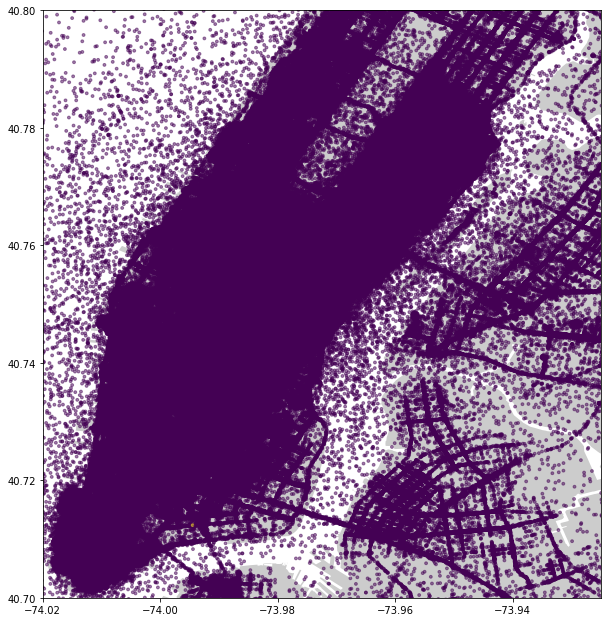

In [28]:
fig, ax = plt.subplots(figsize=(10,20))

street_map.plot(ax=ax, alpha=0.4,color='grey')

geo_df.plot(column='fare_amount',ax=ax,alpha=0.5,markersize=8)
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.show()

In [10]:
def get_cleaned(df):
    return df[(df.fare_amount > 0) & (df.fare_amount < 30) &
              (df.pickup_latitude > 35) & (df.pickup_latitude < 45) &
              (df.pickup_longitude > -80) & (df.pickup_longitude < -68) &
              (df.dropoff_latitude > 35) & (df.dropoff_latitude < 45) &
              (df.pickup_longitude > -80) & (df.dropoff_longitude < -68) &
              (df.passenger_count > 0) & (df.passenger_count < 8)]

new_data = get_cleaned(new_data)

In [11]:
new_data.shape

(5130938, 8)

In [10]:
clean = pd.read_csv("cleaneddata.csv")

FileNotFoundError: [Errno 2] File cleaneddata.csv does not exist: 'cleaneddata.csv'

In [52]:
clean.shape

(4939643, 8)

In [53]:
clean.head()

,fare_amount,passenger_count,year,month,day,hour,minute,total_distance
0,7.3,1,2011,11,21,8,12,1.797494
1,6.5,1,2012,2,9,10,8,1.747274
2,6.5,5,2012,12,30,17,4,0.868605
3,9.7,1,2010,5,3,6,22,2.144219
4,6.5,1,2013,10,12,22,39,0.994622


In [54]:
plt.figure(figsize=(15,7))
sns.barplot(x='weekday', y="fare_amount", data=data, palette=("#fdb813", "#3D2C05"))
plt.ylim(0, 14)
plt.title("Mean Fares among Days of the week")
plt.xlabel('Day of Week')
plt.ylabel('Mean fare')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1080x504 with 0 Axes>

In [58]:
plt.figure(figsize=(15,7))
sns.barplot(x='weekday', y="fare_amount", data=clean, palette=("#fdb813", "#3D2C05"))
plt.ylim(0, 14)
plt.title("Mean Fares among Days of the week")
plt.xlabel('Day of Week')
plt.ylabel('Mean fare')
plt.show()

ValueError: Could not interpret input 'weekday'

<Figure size 1080x504 with 0 Axes>

In [11]:
import datetime

pd.to_datetime(new_data['pickup_datetime'])
new_data['pickup_datetime']=pd.to_datetime(new_data['pickup_datetime'])-datetime.timedelta(hours=4)


In [12]:
new_data.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-11-21 12:12:23.0000001,7.3,2011-11-21 08:12:23+00:00,-73.971863,40.760189,-73.955239,40.782976,1
1,2012-02-09 14:08:36.0000001,6.5,2012-02-09 10:08:36+00:00,-73.969345,40.749676,-73.950876,40.770764,1
2,2012-12-30 21:04:00.000000163,6.5,2012-12-30 17:04:00+00:00,-73.945297,40.775255,-73.959260,40.768440,5
4,2010-05-03 10:22:09.0000004,9.7,2010-05-03 06:22:09+00:00,-73.985811,40.717965,-73.979805,40.748685,1
5,2013-10-13 02:39:00.000000180,6.5,2013-10-12 22:39:00+00:00,-73.990437,40.755912,-73.972912,40.750320,1


In [13]:
new_data.shape

(5130938, 8)

In [14]:
new_data['year']=new_data['pickup_datetime'].dt.year
new_data['month']=new_data['pickup_datetime'].dt.month
new_data['day']=new_data['pickup_datetime'].dt.day
new_data['hour']=new_data['pickup_datetime'].dt.hour
new_data['minute']=new_data['pickup_datetime'].dt.minute
new_data['weekday'] = new_data['pickup_datetime'].dt.weekday

In [15]:
new_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,weekday
0,2011-11-21 12:12:23.0000001,7.3,2011-11-21 08:12:23+00:00,-73.971863,40.760189,-73.955239,40.782976,1,2011,11,21,8,12,0
1,2012-02-09 14:08:36.0000001,6.5,2012-02-09 10:08:36+00:00,-73.969345,40.749676,-73.950876,40.770764,1,2012,2,9,10,8,3
2,2012-12-30 21:04:00.000000163,6.5,2012-12-30 17:04:00+00:00,-73.945297,40.775255,-73.959260,40.768440,5,2012,12,30,17,4,6
4,2010-05-03 10:22:09.0000004,9.7,2010-05-03 06:22:09+00:00,-73.985811,40.717965,-73.979805,40.748685,1,2010,5,3,6,22,0
5,2013-10-13 02:39:00.000000180,6.5,2013-10-12 22:39:00+00:00,-73.990437,40.755912,-73.972912,40.750320,1,2013,10,12,22,39,5


In [16]:
def calculate_distance(df):
    lat1= np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
   
    dlat = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 3956
    return c * r

new_data['total_distance']=haversine(new_data)


NameError: name 'haversine' is not defined

In [68]:
new_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,weekday,total_distance
0,2011-11-21 12:12:23.0000001,7.3,2011-11-21 08:12:23+00:00,-73.971863,40.760189,-73.955239,40.782976,1,2011,11,21,8,12,0,1.797494
1,2012-02-09 14:08:36.0000001,6.5,2012-02-09 10:08:36+00:00,-73.969345,40.749676,-73.950876,40.770764,1,2012,2,9,10,8,3,1.747274
2,2012-12-30 21:04:00.000000163,6.5,2012-12-30 17:04:00+00:00,-73.945297,40.775255,-73.959260,40.768440,5,2012,12,30,17,4,6,0.868605
3,2009-09-19 00:12:00.00000065,13.7,2009-09-18 20:12:00+00:00,0.000000,0.000000,0.000000,0.000000,5,2009,9,18,20,12,4,0.000000
4,2010-05-03 10:22:09.0000004,9.7,2010-05-03 06:22:09+00:00,-73.985811,40.717965,-73.979805,40.748685,1,2010,5,3,6,22,0,2.144219


In [69]:
def get_cleaned(df):
    return df[(df.fare_amount > 0) & (df.fare_amount < 30) &
              (df.pickup_latitude > 35) & (df.pickup_latitude < 45) &
              (df.pickup_longitude > -80) & (df.pickup_longitude < -68) &
              (df.dropoff_latitude > 35) & (df.dropoff_latitude < 45) &
              (df.pickup_longitude > -80) & (df.dropoff_longitude < -68) &
              (df.passenger_count > 0) & (df.passenger_count < 8)]

new_data = get_cleaned(new_data)

In [70]:
new_data=new_data[new_data.total_distance<50]

In [71]:
new_data.shape

(5129430, 15)

In [72]:
new_data.drop(['key','pickup_datetime'],axis=1,inplace=True)
new_data.head()

/Users/saujanya/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,weekday,total_distance
0,7.3,-73.971863,40.760189,-73.955239,40.782976,1,2011,11,21,8,12,0,1.797494
1,6.5,-73.969345,40.749676,-73.950876,40.770764,1,2012,2,9,10,8,3,1.747274
2,6.5,-73.945297,40.775255,-73.959260,40.768440,5,2012,12,30,17,4,6,0.868605
4,9.7,-73.985811,40.717965,-73.979805,40.748685,1,2010,5,3,6,22,0,2.144219
5,6.5,-73.990437,40.755912,-73.972912,40.750320,1,2013,10,12,22,39,5,0.994622


In [73]:
new_data.shape

(5129430, 13)

In [78]:
new_data.drop(new_data[new_data['year'] == 2008].index, inplace = True) 
    

/Users/saujanya/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
new_data.shape

(5129135, 13)

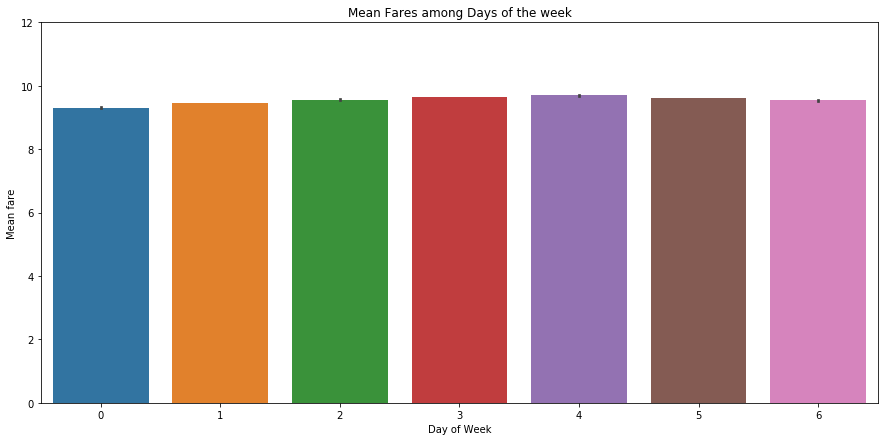

In [94]:
plt.figure(figsize=(15,7))
sns.barplot(x='weekday', y="fare_amount", data=new_data)
sns.color_palette("rocket")
plt.ylim(0, 10)
plt.title("Mean Fares among Days of the week")
plt.xlabel('Day of Week')
plt.ylabel('Mean fare')
plt.show()

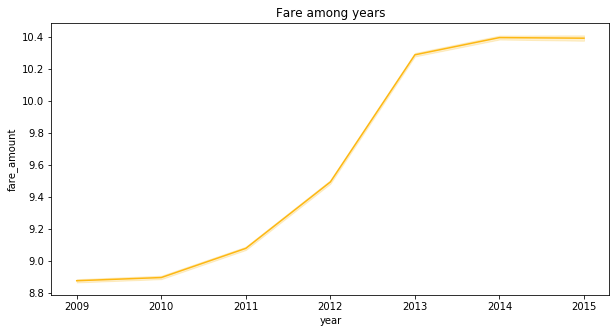

In [81]:
plt.figure(figsize=(10,5))
sns.lineplot(x="year", y="fare_amount", data=new_data, color="")
plt.title("Fare among years")
plt.show()


In [76]:
new_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,weekday,total_distance
count,5.129430e+06,5.129430e+06,5.129430e+06,5.129430e+06,5.129430e+06,5.129430e+06,5.129430e+06,5.129430e+06,5.129430e+06,5.129430e+06,5.129430e+06,5.129430e+06,5.129430e+06
mean,9.553529e+00,-7.397889e+01,4.075208e+01,-7.397684e+01,4.075233e+01,1.688285e+00,2.011709e+03,6.261351e+00,1.571945e+01,1.212046e+01,2.960613e+01,2.989917e+00,1.703284e+00
std,5.162651e+00,3.271096e-02,2.945288e-02,3.379265e-02,3.239789e-02,1.305585e+00,1.862417e+00,3.438792e+00,8.682005e+00,5.829525e+00,1.732693e+01,1.904022e+00,1.407732e+00
min,1.000000e-02,-7.878032e+01,3.518750e+01,-7.878032e+01,3.518952e+01,1.000000e+00,2.008000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399254e+01,4.073717e+01,-7.399174e+01,4.073661e+01,1.000000e+00,2.010000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.500000e+01,1.000000e+00,7.592098e-01
50%,8.100000e+00,-7.398236e+01,4.075343e+01,-7.398098e+01,4.075400e+01,1.000000e+00,2.012000e+03,6.000000e+00,1.600000e+01,1.300000e+01,3.000000e+01,3.000000e+00,1.276185e+00
75%,1.170000e+01,-7.396967e+01,4.076726e+01,-7.396683e+01,4.076833e+01,2.000000e+00,2.013000e+03,9.000000e+00,2.300000e+01,1.700000e+01,4.500000e+01,5.000000e+00,2.197983e+00
max,2.997000e+01,-6.803000e+01,4.474379e+01,-6.803000e+01,4.456388e+01,7.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,4.982365e+01


In [83]:
import matplotlib.pyplot as plt

In [85]:
hist(new_data["passenger_count"], bins=7, color=("#fdb813"))
set_title("Number of passengers frequency")
set_xlabel('No. of Passengers')
set_ylabel('Frequency')

NameError: name 'hist' is not defined

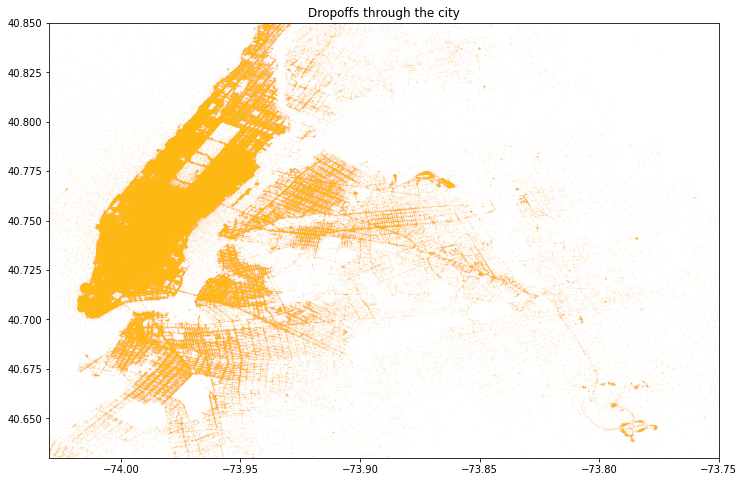

In [86]:
dropoff_longitude = new_data['dropoff_longitude'].to_numpy()
dropoff_latitude = new_data['dropoff_latitude'].to_numpy()

plt.figure(figsize=(12,8))
plt.scatter(dropoff_longitude, dropoff_latitude,
                color="#fdb813", 
                s=.02, alpha=.2)
plt.title("Dropoffs through the city")
# Borders of the city
plt.xlim(-74.03, -73.75)
plt.ylim(40.63, 40.85)
plt.show()

In [87]:
crs = {'init':'espg:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(new_data['pickup_longitude'], new_data['pickup_latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(new_data,
 crs = crs,
 geometry = geometry)


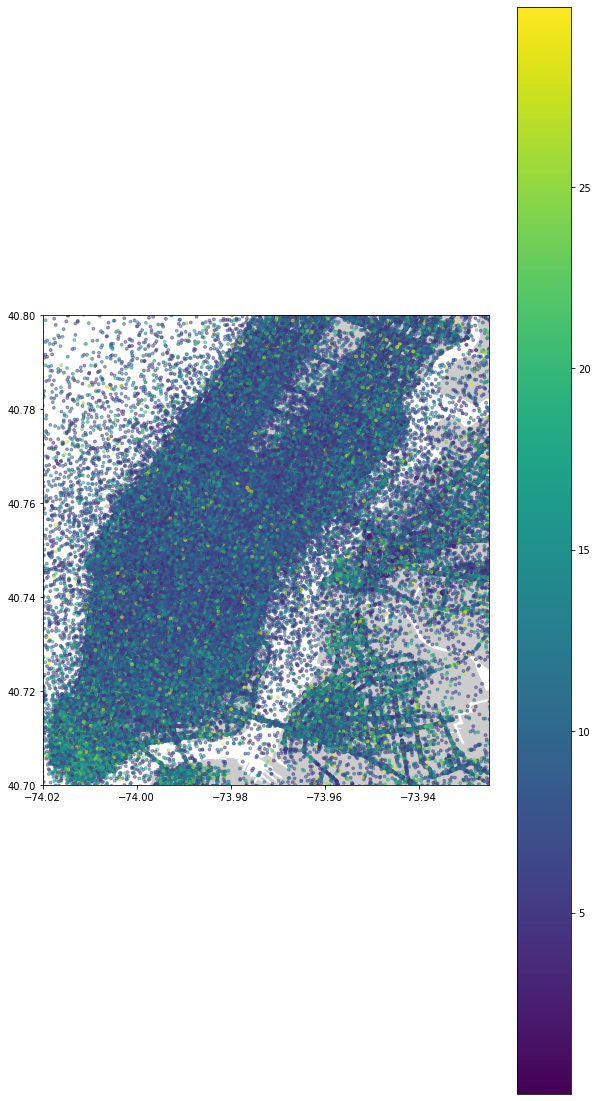

In [89]:
fig, ax = plt.subplots(figsize=(10,20))

street_map.plot(ax=ax, alpha=0.4,color='grey')

geo_df.plot(column='fare_amount',ax=ax,alpha=0.5,legend=True,markersize=8)
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.show()

In [16]:
df = pd.read_csv('cleaneddata.csv')

In [17]:
df.shape


(4939643, 8)

In [18]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,minute,total_distance
0,7.3,1,2011,11,21,8,12,1.797494
1,6.5,1,2012,2,9,10,8,1.747274
2,6.5,5,2012,12,30,17,4,0.868605
3,9.7,1,2010,5,3,6,22,2.144219
4,6.5,1,2013,10,12,22,39,0.994622


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X = df.iloc[:,1:8]

In [21]:
X.head()

,passenger_count,year,month,day,hour,minute,total_distance
0,1,2011,11,21,8,12,1.797494
1,1,2012,2,9,10,8,1.747274
2,5,2012,12,30,17,4,0.868605
3,1,2010,5,3,6,22,2.144219
4,1,2013,10,12,22,39,0.994622


In [22]:
y = df.iloc[:,0]

In [23]:
y.head()

0    7.3
1    6.5
2    6.5
3    9.7
4    6.5
Name: fare_amount, dtype: float64

In [24]:
X.shape

(4939643, 7)

In [25]:
y.shape

(4939643,)

In [26]:
lr = LinearRegression()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
prediction = lr.predict(X_test)

In [34]:
prediction

array([14.49936588, 13.99447411,  8.49116393, ..., 10.62318738,
        5.755456  ,  8.95672616])

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [36]:
r2_score(y_test, prediction)

0.67885559971713

In [38]:
mean_squared_error(y_test, prediction)

6.223832714157098

In [39]:
y_test.head()

2655825    10.5
444214     12.5
4856155    12.1
1449429    10.5
1903446    10.9
Name: fare_amount, dtype: float64

In [40]:
prediction

array([14.49936588, 13.99447411,  8.49116393, ..., 10.62318738,
        5.755456  ,  8.95672616])

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dt = DecisionTreeRegressor()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
prediction = dt.predict(X_test)

In [45]:
r2_score(y_test, prediction)

0.402058154445165

In [46]:
mean_squared_error(y_test, prediction)

11.588213950639322

In [47]:
y_test.head()

2655825    10.5
444214     12.5
4856155    12.1
1449429    10.5
1903446    10.9
Name: fare_amount, dtype: float64

In [48]:
prediction

array([13.7, 14.5, 12.9, ..., 11.3,  4.9,  8.5])

In [49]:
y_test.tail()

3395245    8.5
4089482    8.9
2368208    8.1
1193120    4.1
404851     5.2
Name: fare_amount, dtype: float64

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(n_estimators=5, max_depth=10)

In [14]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
prediction = rf.predict(X_test)

In [18]:
r2_score(y_test,prediction)

0.7194918402661048

In [19]:
mean_squared_error(y_test,prediction)

5.436295509440792

In [20]:
prediction

array([13.86920117, 13.45845964,  8.40932986, ...,  9.85736187,
        5.57834054,  9.37195636])

In [21]:
y_test.head

<bound method NDFrame.head of 2655825    10.5
444214     12.5
4856155    12.1
1449429    10.5
1903446    10.9
           ... 
3395245     8.5
4089482     8.9
2368208     8.1
1193120     4.1
404851      5.2
Name: fare_amount, Length: 1630083, dtype: float64>

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
std = StandardScaler()

In [19]:
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
prediction = lr.predict(X_test_scaled)

In [30]:
r2_score(y_test, prediction)

0.6788555997171297

In [31]:
mean_squared_error(y_test,prediction)

6.223832714157102

In [32]:
X_train_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [34]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
prediction = rf.predict(X_test_scaled)

In [36]:
r2_score(y_test,prediction)

0.7195495415981665

In [37]:
mean_squared_error(y_test, prediction)

5.435177247880507

In [13]:
from sklearn.svm import SVR


In [39]:
svm = SVR(kernel='rbf', max_iter=250)

In [20]:
svm.fit(X_test_scaled,y_test)

/Users/saujanya/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=5, shrinking=True, tol=0.001, verbose=False)

In [21]:
prediction = svm.predict(X_test_scaled)

In [22]:
mean_squared_error(y_test,prediction)

54.6461344975263

In [23]:
r2_score(y_test,prediction)

-1.8196934103107334

In [24]:
prediction

array([14.86858786, 14.96406269, 15.00491901, ..., 14.96888425,
       14.95993529, 14.95335451])

In [25]:
y_test

2655825    10.5
444214     12.5
4856155    12.1
1449429    10.5
1903446    10.9
           ... 
3395245     8.5
4089482     8.9
2368208     8.1
1193120     4.1
404851      5.2
Name: fare_amount, Length: 1630083, dtype: float64

In [40]:
svm.fit(X_train,y_train)

/Users/saujanya/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=250, shrinking=True, tol=0.001, verbose=False)

In [41]:
prediction = svm.predict(X_test)

In [42]:
mean_squared_error(y_test,prediction)

54.104286225182136

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
knn = KNeighborsRegressor(n_neighbors=10)

In [31]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [32]:
prediction = knn.predict(X_test)

In [33]:
r2_score(y_test, prediction)

0.6345478073324544

In [34]:
import xgboost as xg


ModuleNotFoundError: No module named 'xgboost'

In [35]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 4.7 MB/s eta 0:00:01


In [36]:
import xgboost as xg

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/saujanya/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/saujanya/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']
